### Python GP Lab session - evaluation
---

By Paul Duckworth

CDT Data Estimation and Inference Lab session: http://www.robots.ox.ac.uk/~mosb/aims_cdt/

Using Gpy Library

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
from IPython.display import display

In [2]:
# # We first load the weather sensor data from the Port of Southampton:
url="http://www.robots.ox.ac.uk/~mosb/teaching/AIMS_CDT/sotonmet.txt"
data=pd.read_csv(url)

data.drop(['Update Date and Time (ISO)', 'Update Duration (ms)'], axis=1, inplace=True)
data.rename(columns = {'Tide height (m)':'y', 
                       'Reading Date and Time (ISO)':'t'}, inplace = True)

data['timeline'] = data.index

train_set = data[~np.isnan(data['y'])]
test_set = data[np.isnan(data['y'])]

print "check split:", train_set.shape, test_set.shape, test_set.shape[0] + train_set.shape[0], data.shape
data.head()


check split: (917, 18) (341, 18) 1258 (1258, 18)


,t,Air pressure (mb),Air temperature (C),y,Wind direction (deg),Wind gust speed (kn),Wind speed (kn),True air temperature (C),True tide height (m),Independent tide height prediction (m),Independent tide height deviation (m),Dependent tide height prediction (m),Dependent tide height deviation (m),Independent air temperature prediction (C),Independent air temperature deviation (C),Dependent air temperature prediction (C),Dependent air temperature deviation (C),timeline
0,2007-05-26T12:05:00,NaN,NaN,NaN,NaN,NaN,NaN,16.92,2.30,2.4007,0.039110,2.3715,0.036670,17.2348,0.23222,17.2339,0.23187,0
1,2007-05-26T12:10:00,1006.0,16.7,2.3,22.0,12.0,12.4,16.42,2.24,2.4016,0.058707,2.3365,0.045564,17.1932,0.29931,17.1848,0.29732,1
2,2007-05-26T12:15:00,1006.0,16.0,2.2,13.0,18.1,13.2,16.00,2.19,2.2945,0.037006,2.2836,0.029853,16.8005,0.25186,16.8130,0.24920,2
3,2007-05-26T12:20:00,1006.0,15.9,2.1,16.0,14.2,13.0,15.92,2.14,2.1455,0.021627,2.1553,0.019945,16.0734,0.17207,16.0621,0.17101,3
4,2007-05-26T12:25:00,1005.0,16.1,2.1,12.0,14.4,12.0,16.08,2.09,2.0900,0.028609,2.1115,0.023468,15.8401,0.21507,15.8126,0.21158,4


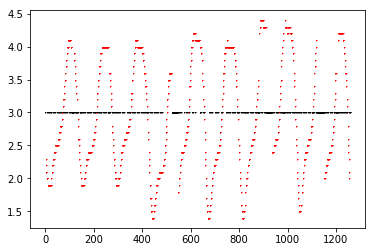

In [3]:
plt.clf()
# Plot the Tide height (m) against reading time/day
plt.plot(train_set.timeline, train_set.y,'r+', markersize=1)

## Test points are here:
plt.plot(test_set.timeline, np.ones(len(test_set.timeline))*3,'k+', markersize=1)

# plt.axis([0, 100, 1, 5])
# plt.xticks(train_set.timeline.iloc[::400], train_set.t[::400], rotation=0)
plt.show()


In [4]:
#reshape train and test data:
X = np.array(train_set.timeline.values).reshape(len(train_set.timeline),1)
Xtest = np.array(test_set.timeline.values).reshape(len(test_set.timeline),1)
y = np.array(train_set.y.values).reshape(len(train_set.y),1)
y2 = (y - y.mean())/np.std(y)

ytrue = np.array(test_set['True tide height (m)'].values).reshape(len(test_set.y),1)

In [15]:
#specify RBF Kernel
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
# kernel = GPy.kern.PeriodicExponential(input_dim=1, variance=1.0, lengthscale=1.0)

In [16]:
#specify the regression model
m = GPy.models.GPRegression(X,y2,kernel)
m.Gaussian_noise.variance = 0.01
m
print m.log_likelihood()
display(m)

-872.3198628561845


GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,0.01,+ve,


In [10]:
# m.kern.K(X)+0.1**2*np.eye(len(y))
# m.predict(X)[0]

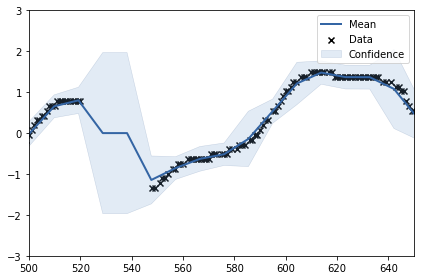

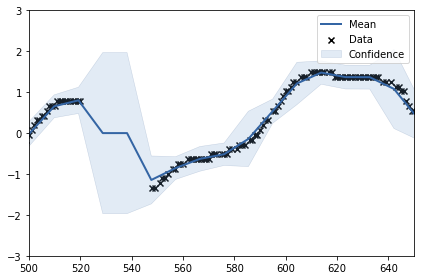

In [17]:
fig = m.plot()
plt.axis([500, 650, -3, 3])
GPy.plotting.show(fig)#, filename='basic gp regression')

In [18]:
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    02s14  0018  -1.354810e+03   4.401712e-11 
Runtime:     02s14
Optimization status: Converged



GP_regression.,value,constraints,priors
periodic_exponential.variance,5.2440992633394394e-08,+ve,
periodic_exponential.lengthscale,12.458981194908139,+ve,
periodic_exponential.period,7.34847155802612,+ve,
Gaussian_noise.variance,1.0000040467217683,+ve,


-1301.1666362468186


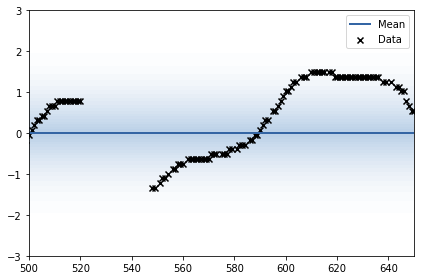

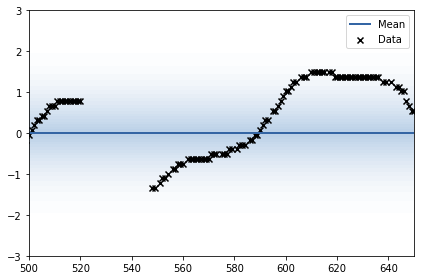

In [12]:
display(m)
m.Gaussian_noise.variance.fix()
print m.log_likelihood()

fig = m.plot(plot_density=True)
plt.axis([500, 650, -3, 3])
GPy.plotting.show(fig) #, filename='basic_gp_regression_notebook_optimized')

In [14]:
#specify Mattern Kernel
kernel1 = GPy.kern.Matern32(input_dim=1, variance=1.0, lengthscale=1.0)
kernel2 = GPy.kern.PeriodicExponential(input_dim=1, variance=1.0,  period=1.0,  lengthscale=1.0)

K = np.multiply(kernel1, kernel2)

#specify the regression model
m = GPy.models.GPRegression(X,y2,K)
display(m)
m.optimize(messages=True)

GP_regression.,value,constraints,priors
mul.Mat32.variance,1.0,+ve,
mul.Mat32.lengthscale,1.0,+ve,
mul.periodic_exponential.variance,1.0,+ve,
mul.periodic_exponential.lengthscale,1.0,+ve,
mul.periodic_exponential.period,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    02s45  0008   1.295611e+03   4.854179e+03 
    07s81  0028  -1.120811e+03   6.675150e+05 
    17s66  0068  -1.153381e+03   3.342343e+08 
Runtime:     17s66
Optimization status: Converged



In [17]:
display(m)

GP_regression.,value,constraints,priors
mul.Mat32.variance,38.2612621706,+ve,
mul.Mat32.lengthscale,71.9744588787,+ve,
mul.periodic_exponential.variance,38.2612621706,+ve,
mul.periodic_exponential.lengthscale,0.00020612330984,+ve,
mul.periodic_exponential.period,1.00160646292,+ve,
Gaussian_noise.variance,0.00116833948386,+ve,


## Coregionalized Regression Model (for multi-output)

Taken from [this](http://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/coregionalized_regression_tutorial.ipynb) tutorial 


In [5]:
K = GPy.kern.RBF(1)
B = GPy.kern.Coregionalize(input_dim=1,output_dim=2) 
multkernel = K.prod(B, name='B.K')
print multkernel

#Components of B
print 'W matrix\n',B.W
print '\nkappa vector\n',B.kappa
print '\nB matrix\n',B.B

NameError: name 'GPy' is not defined

In [39]:

data

,t,Air pressure (mb),Air temperature (C),y,Wind direction (deg),Wind gust speed (kn),Wind speed (kn),True air temperature (C),True tide height (m),Independent tide height prediction (m),Independent tide height deviation (m),Dependent tide height prediction (m),Dependent tide height deviation (m),Independent air temperature prediction (C),Independent air temperature deviation (C),Dependent air temperature prediction (C),Dependent air temperature deviation (C),timeline
0,2007-05-26T12:05:00,NaN,NaN,NaN,NaN,NaN,NaN,16.92,2.30,2.4007,0.039110,2.3715,0.036670,17.2348,0.23222,17.2339,0.23187,0
1,2007-05-26T12:10:00,1006.0,16.7,2.3,22.0,12.0,12.4,16.42,2.24,2.4016,0.058707,2.3365,0.045564,17.1932,0.29931,17.1848,0.29732,1
2,2007-05-26T12:15:00,1006.0,16.0,2.2,13.0,18.1,13.2,16.00,2.19,2.2945,0.037006,2.2836,0.029853,16.8005,0.25186,16.8130,0.24920,2
3,2007-05-26T12:20:00,1006.0,15.9,2.1,16.0,14.2,13.0,15.92,2.14,2.1455,0.021627,2.1553,0.019945,16.0734,0.17207,16.0621,0.17101,3
4,2007-05-26T12:25:00,1005.0,16.1,2.1,12.0,14.4,12.0,16.08,2.09,2.0900,0.028609,2.1115,0.023468,15.8401,0.21507,15.8126,0.21158,4
5,2007-05-26T12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,16.83,2.05,2.0419,0.027407,2.0642,0.022255,15.7375,0.20412,15.7294,0.20055,5
6,2007-05-26T12:35:00,1005.0,17.4,2.0,2.0,15.4,13.8,17.83,2.01,1.9907,0.035981,2.0257,0.027150,15.5320,0.24708,15.4981,0.24113,6
7,2007-05-26T12:40:00,1005.0,17.3,2.0,8.0,11.3,12.2,17.25,1.97,1.9743,0.021228,1.9839,0.019161,16.7486,0.16510,16.6806,0.16279,7
8,2007-05-26T12:45:00,1005.0,17.6,2.0,16.0,15.2,10.9,17.58,1.95,1.9361,0.027829,1.9493,0.023059,16.7721,0.19571,16.6877,0.19175,8
9,2007-05-26T12:50:00,1005.0,17.3,1.9,27.0,13.6,12.5,17.25,1.93,1.9388,0.026966,1.9295,0.021669,17.1471,0.18507,17.0626,0.18173,9


In [86]:
# K = GPy.kern.Matern32(1)
icm = GPy.util.multioutput.ICM(input_dim=1, num_outputs=2, kernel=K)

#recreate train and test data for y1 and y2:
y1 = np.array(train_set.y.values).reshape(len(train_set.y),1)
y1 = (y1 - y1.mean())/np.std(y1)

y2 = np.array(train_set['Air temperature (C)'].values).reshape(len(train_set['Air temperature (C)']),1)
y2 = (y2 - y2.mean())/np.std(y2)

y1_true = np.array((test_set['True tide height (m)'].values).reshape(len(test_set.y),1) - y1.mean())/np.std(y1)
y2_true = np.array((test_set['True air temperature (C)'].values).reshape(len(test_set.y),1)- y2.mean())/np.std(y2)

In [87]:
m = GPy.models.GPCoregionalizedRegression([X, X],[y1, y2], kernel=icm)
m.optimize()
print m


Name : gp
Objective : -2045.8682715
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  gp.                                    |             value  |  constraints  |  priors
  ICM.Mat32.variance                     |     1.42227582444  |      +ve      |        
  ICM.Mat32.lengthscale                  |     43.6366470841  |      +ve      |        
  ICM.B.W                                |            (2, 1)  |               |        
  ICM.B.kappa                            |              (2,)  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |  0.00105910317593  |      +ve      |        
  mixed_noise.Gaussian_noise_1.variance  |  0.00539812708327  |      +ve      |        


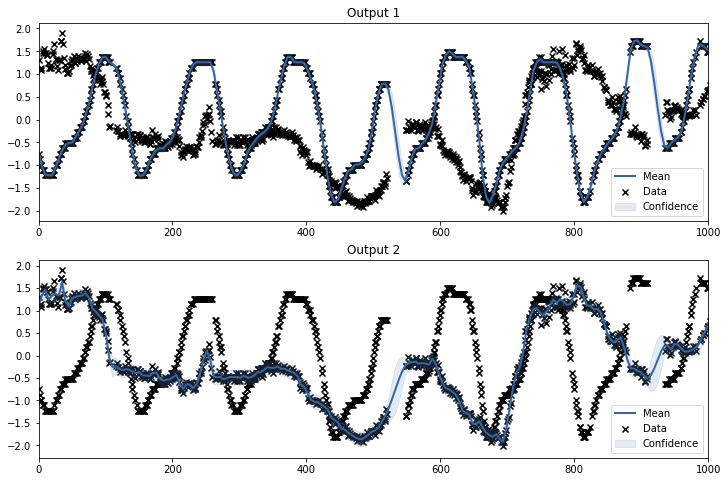

In [99]:
import pylab as pb

def plot_2outputs(m, xlim, ylim):
    fig = pb.figure(figsize=(12,8))

    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim, fixed_inputs=[(1,0)], ax=ax1)
    ax1.legend()
    
    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim, fixed_inputs=[(1,1)],ax=ax2)
    ax2.legend()
    plt.show()

plot_2outputs(m, xlim=(0,1000),ylim=(0,60))
plt.show()


In [62]:
## the fit of a non-coregionalized model (i.e., two independent models):
K = GPy.kern.Matern32(1)

m1 = GPy.models.GPRegression(X, y1, kernel=K.copy())
m1.optimize()
m2 = GPy.models.GPRegression(X, y2, kernel=K.copy())

m2.optimize()

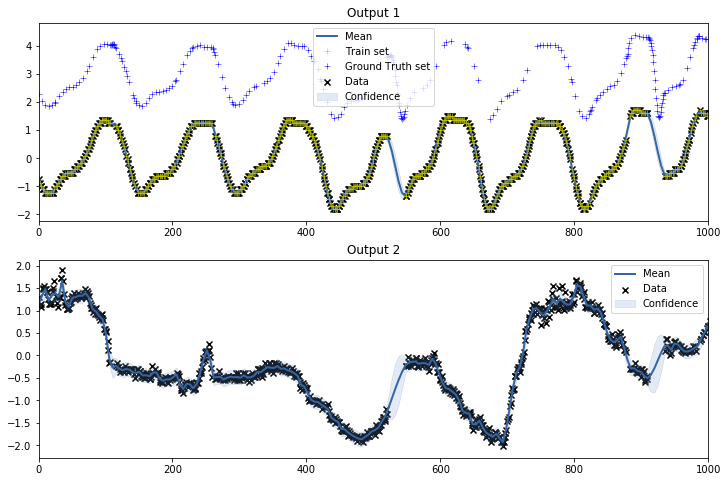

In [94]:
plt.clf()
xlim = (0,1000); ylim = (0,50)
fig = pb.figure(figsize=(12,8))
#Output 1
ax1 = fig.add_subplot(211)
m1.plot(plot_limits=xlim, ax=ax1)

ax1.plot(X, y1,'y+', mew=0.5,label='Train set')
ax1.plot(Xtest, y1_true,'b+', mew=0.5,label='Ground Truth set')
ax1.set_title('Output 1')
ax1.legend()

#Output 2
ax2 = fig.add_subplot(212)
m2.plot(plot_limits=xlim, ax=ax2)
# ax2.plot(X, y2,'rx', mew=0.5, label="Training Points")
ax2.set_title('Output 2')
ax2.legend()

plt.show()